# IMPORTING LIABRARIES

In [1106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# DATA COLLECTION

In [1107]:
house_data=pd.read_csv('Mumbai_NEW.csv')

In [1108]:
house_data

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1.0,0,0,1,1,1.0,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1.0,0,1,1,1,1.0,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1.0,0,1,1,1,1.0,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1.0,0,0,1,1,1.0,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1.0,0,0,1,1,1.0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1994,2300000,254,Mira Road East,1.0,0,0,1,0,0.0,1,0,0,0,0,0,0,0,0
1995,1995,2000000,220,Mira Road East,1.0,0,0,1,0,0.0,1,0,0,0,0,0,1,0,0
1996,1996,8300000,525,Kandivali East,1.0,0,1,1,1,1.0,1,0,1,1,0,0,1,1,1
1997,1997,7400000,650,Nerul,1.0,0,0,1,1,0.0,1,0,0,0,0,0,1,0,0


# DATA PREPROCESSING

In [1109]:
house_data.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1.0,0,0,1,1,1.0,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1.0,0,1,1,1,1.0,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1.0,0,1,1,1,1.0,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1.0,0,0,1,1,1.0,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1.0,0,0,1,1,1.0,1,0,0,1,1,0,0,0,0


We can get starting 5 datas from dataset

In [1110]:
house_data.tail()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
1994,1994,2300000,254,Mira Road East,1.0,0,0,1,0,0.0,1,0,0,0,0,0,0,0,0
1995,1995,2000000,220,Mira Road East,1.0,0,0,1,0,0.0,1,0,0,0,0,0,1,0,0
1996,1996,8300000,525,Kandivali East,1.0,0,1,1,1,1.0,1,0,1,1,0,0,1,1,1
1997,1997,7400000,650,Nerul,1.0,0,0,1,1,0.0,1,0,0,0,0,0,1,0,0
1998,1998,9500000,826,Kolshet Industrial Area,2.0,0,0,1,1,1.0,1,0,0,0,0,0,0,0,0


We can get last 5 datas from dataset

In [1111]:
house_data.shape

(1999, 19)

Here we have 1999 rows and total 19 columns

In [1112]:
house_data.columns

Index(['Unnamed: 0', 'Price', 'Area', 'Location', 'No. of Bedrooms',
       'New/Resale', 'Gymnasium', 'Lift Available', 'Car Parking',
       'Maintenance Staff', '24x7 Security', 'Children's Play Area',
       'Clubhouse', 'Intercom', 'Landscaped Gardens', 'Indoor Games',
       'Gas Connection', 'Jogging Track', 'Swimming Pool'],
      dtype='object')

From columns function we will get the names of all columns present inside the dataset

In [1113]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1999 non-null   int64  
 1   Price                 1999 non-null   int64  
 2   Area                  1999 non-null   int64  
 3   Location              1999 non-null   object 
 4   No. of Bedrooms       1973 non-null   float64
 5   New/Resale            1999 non-null   int64  
 6   Gymnasium             1999 non-null   int64  
 7   Lift Available        1999 non-null   int64  
 8   Car Parking           1999 non-null   int64  
 9   Maintenance Staff     1985 non-null   float64
 10  24x7 Security         1999 non-null   int64  
 11  Children's Play Area  1999 non-null   int64  
 12  Clubhouse             1999 non-null   int64  
 13  Intercom              1999 non-null   int64  
 14  Landscaped Gardens    1999 non-null   int64  
 15  Indoor Games         

from info function we can understand column names with their count , whether it is having any null values or not and their datatypes.
Here we have 16 - int64 columns, 2- float64 columns and only 1 Object(categorical) column

In [1114]:
house_data['Location'].unique()
# len(house_data.Location.unique())

array(['Kharghar', 'Sector-13 Kharghar', 'Sector 18 Kharghar',
       'Sector 20 Kharghar', 'Sector 15 Kharghar', 'Dombivali',
       'Churchgate', 'Prabhadevi', 'Jogeshwari West', 'Kalyan East',
       'Malad East', 'Virar East', 'Virar', 'Malad West', 'Borivali East',
       'Mira Road East', 'Goregaon West', 'Kandivali West',
       'Borivali West', 'Kandivali East', 'Andheri East', 'Goregaon East',
       'Wadala', 'Ulwe', 'Dahisar', 'kandivali', 'Goregaon',
       'Bhandup West', 'thakur village kandivali east', 'Santacruz West',
       'Kanjurmarg', 'I C Colony', 'Dahisar W', 'Marol', 'Parel',
       'Lower Parel', 'Worli', 'Jogeshwari East', 'Chembur Shell Colony',
       'Central Avenue', 'Chembur East', 'Diamond Market Road', 'Mulund',
       'Nalasopara West', 'raheja vihar', 'Powai Lake', 'MHADA Colony 20',
       'Tolaram Colony', 'Taloja', 'Thane West', 'Vangani',
       'Sector 5 Ulwe', 'Sector12 New Panvel', 'Sector 17 Ulwe',
       'Sector9 Kamothe', 'Sector 19 Kharghar

From unique function we will get total unique values in Location Columns.if we use len() function we can get total count of unique values that is 356.

In [1115]:
house_data['No. of Bedrooms'].value_counts()

2.0    776
1.0    678
3.0    422
4.0     75
5.0     17
6.0      3
7.0      2
Name: No. of Bedrooms, dtype: int64

from value_counts() function we can count the total no. of elements present in columns.Here we can see in No. of bedroom column we have 776 values for 2 bhk,678 values for 1 bhk,422 values for 3 bhk , 75 values for 4 bhk , 17 for  bhk, 3 for 6 bhk and 2 for 7 bhk.


In [1116]:
house_data.duplicated().sum()

0

Duplicated( ) function tells us whether data contain any duplicate values or not . Here we can see we have 0 duplicated values in the dataset.

**Checking for null values**

In [1117]:
house_data.isnull().sum()

Unnamed: 0               0
Price                    0
Area                     0
Location                 0
No. of Bedrooms         26
New/Resale               0
Gymnasium                0
Lift Available           0
Car Parking              0
Maintenance Staff       14
24x7 Security            0
Children's Play Area     0
Clubhouse                0
Intercom                 0
Landscaped Gardens       0
Indoor Games             0
Gas Connection           0
Jogging Track            0
Swimming Pool            0
dtype: int64

is null( ) function is used to check null values in the dataset
Here we can see we have 26 null values in the No. of bedrooms column and 14 in the Maintainance staff

Removing null values by **bfill** strategy

*Filling null value with the next ones * 

In [1118]:
house_data=house_data.fillna(method ='bfill')

fillna function is used to fill the null values with some methods
we have so many methods like replace with mean ,median,mode or by bfill,ffill etc.
Here we are using bfill method.

In [1119]:
house_data.isnull().sum()

Unnamed: 0              0
Price                   0
Area                    0
Location                0
No. of Bedrooms         0
New/Resale              0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

Now we can see we dont have any null values

**Removing unnecessary columns**

In [1120]:
house_data=house_data.drop(['Unnamed: 0',"Children's Play Area",'Gas Connection','Jogging Track','Intercom','Clubhouse','Gymnasium','Indoor Games',],axis=1)

In the dataset we dont need some of the columns.So,We can remove some unnecessary columns from datasets by usin drop function.

In [1121]:
house_data.shape

(1999, 11)

No if we check we have only 11 columns

In [1122]:
house_data['Price_per_sqft'] = house_data['Price']/house_data['Area']

Here we are making price per square fit for houses by dividing actual price with area

# DATA VISUALIZATION

Univariate Analysis

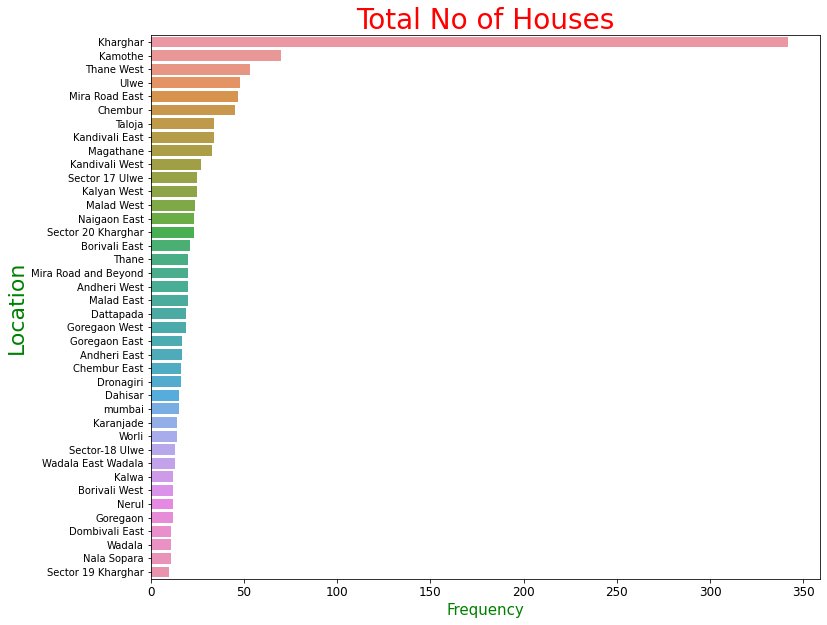

In [1123]:
plt.figure(figsize=(12,10))
most_cat = house_data['Location'].value_counts()[:40]
sns.barplot(x=most_cat, y=most_cat.index, data=house_data)
plt.xticks(size=12)
plt.xlabel("Frequency",size=15,c="g")
plt.ylabel("Location",size=22,c="g")
plt.title("Total No of Houses",size=28,c="r")
plt.show()

**Conclusion** :Total houses are more in Kharghar ,Kamothe,Thane west,Ulawe side

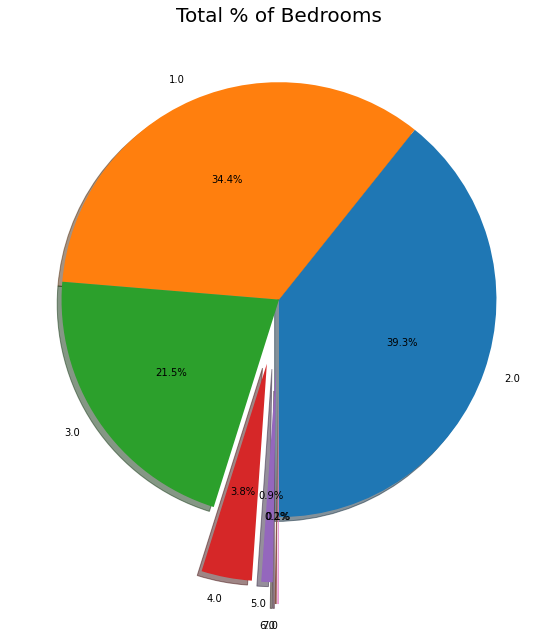

In [1124]:
plt.figure(figsize=(10,10))
labels =house_data['No. of Bedrooms'].value_counts(sort = True).index
sizes = house_data['No. of Bedrooms'].value_counts(sort = True)
explode = (0.0, 0.0, 0.0, 0.3, 0.3, 0.4,0.4)
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,explode=explode)
plt.title('Total % of Bedrooms',size = 20)
plt.show()


**Conclusion:**1 BHK and 2 BHK and 3 BHK sales are very more and
4,5,6 and 7 BHK is very very less i.e less than 10%

**Bivariate** **Analysis**

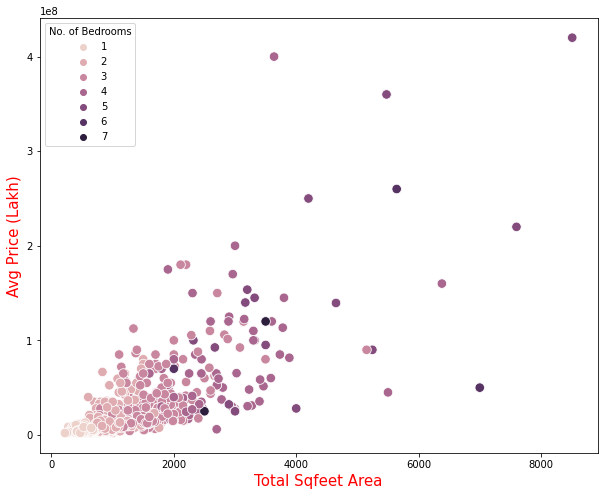

In [1125]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Area',y='Price',data=house_data,hue='No. of Bedrooms',s=90)
plt.xlabel("Total Sqfeet Area",size=15,c="r")
plt.ylabel("Avg Price (Lakh)",size=15,c="r")
plt.show()

**Conclusion:** From this Scatterplot we can analyse as the area of house increases the price of the house is also increasing.area and price has strong postive correlation.
More area more the price of house

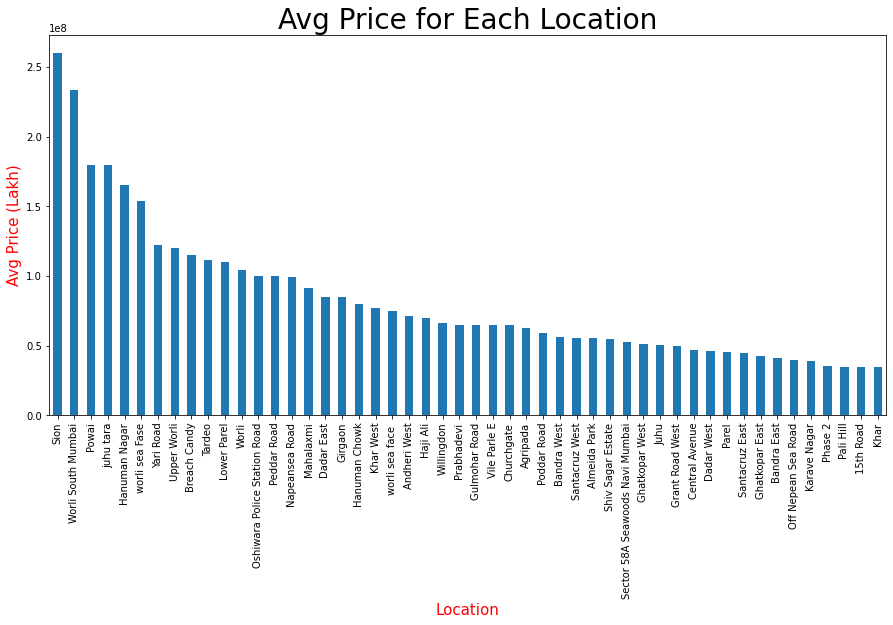

In [1126]:
plt.figure(figsize=(15,7))
house_data.groupby("Location")['Price'].mean().sort_values(ascending=False)[:50].plot(kind="bar")
plt.xlabel("Location",size=15,c="r")
plt.ylabel("Avg Price (Lakh)",size=15,c="r")
plt.title("Avg Price for Each Location",size=28,c="k")
plt.show()


**Conclusion**: Avg price is very high in sion area.
South Mumbai, Juhu, Worli sea fase and Lower Prael has also higher rate 

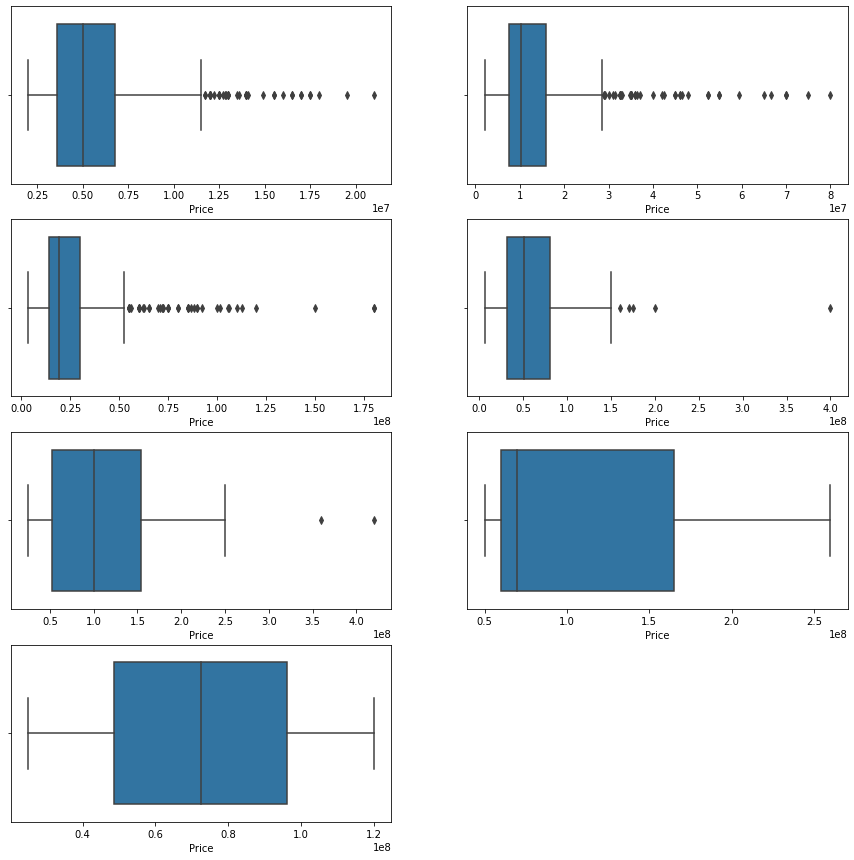

In [1127]:
df_1=house_data[house_data['No. of Bedrooms']==1]
df_2=house_data[house_data['No. of Bedrooms']==2]
df_3=house_data[house_data['No. of Bedrooms']==3]
df_4=house_data[house_data['No. of Bedrooms']==4]
df_5=house_data[house_data['No. of Bedrooms']==5]
df_6=house_data[house_data['No. of Bedrooms']==6]
df_7=house_data[house_data['No. of Bedrooms']==7]
plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
sns.boxplot(data=df_1,x=df_1['Price'])
plt.subplot(4,2,2)
sns.boxplot(data=df_2,x=df_2['Price'])
plt.subplot(4,2,3)
sns.boxplot(data=df_3,x=df_3['Price'])
plt.subplot(4,2,4)
sns.boxplot(data=df_4,x=df_4['Price'])
plt.subplot(4,2,5)
sns.boxplot(data=df_5,x=df_5['Price'])
plt.subplot(4,2,6)
sns.boxplot(data=df_6,x=df_6['Price'])
plt.subplot(4,2,7)
sns.boxplot(data=df_7,x=df_7['Price'])
plt.show()



Conclusion : The graph is showing outliers if we comparing price with respect to no. of bedrroms.here we have more outliers in 1,2 and 3 BHK whereas no outliers in 6 and 7 BHK

**Multivariate Analysis**

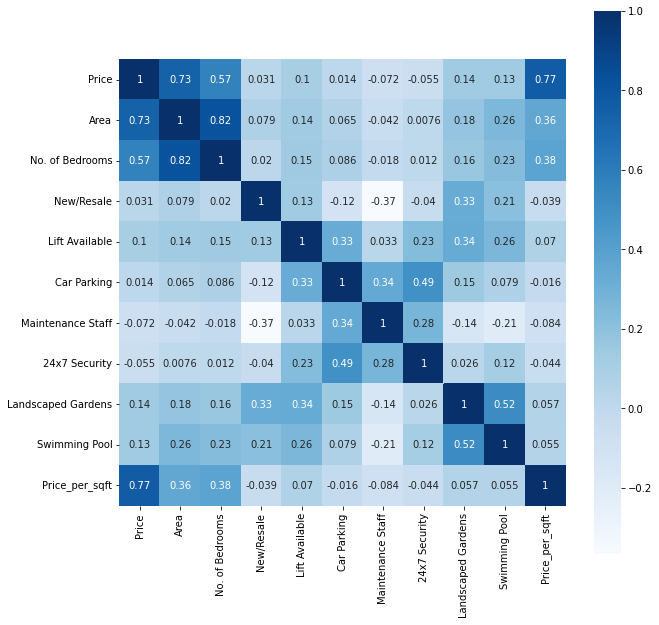

In [1128]:
house_corr=house_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(house_corr,square=True,cbar=True,annot=True,cmap='Blues')
plt.show()

**Conclusion:** As we can see Area and No.of bedrooms are highly correlated with Price

In [1129]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
house_data['Location']= label_encoder.fit_transform(house_data['Location'])

As we know we have one catogarical column in the dataset.but we need to convert that in numerical form to feed it to our model because machine undesrtand only numerical values.
we have different techniques like simple imputer,one hot encoding ,get_dummies method etc.Here I used label encoder.

In [1130]:
def removeOutliners(df):
  df_Out = pd.DataFrame()
  for key,subdf in df.groupby('Location'):
    m = np.mean(subdf.Price_per_sqft)
    st = np.std(subdf.Price_per_sqft)
    reduced = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
    df_Out = pd.concat([df_Out,reduced],ignore_index=True)
  return df_Out
house_data = removeOutliners(house_data)
house_data.shape

(1303, 12)

As we know we have some outliers which we found during boxplot. we need to remove that to make our model more accurate and enhance prediction.

# TRAIN_TEST_SPLIT

In [1131]:
X=house_data.drop(columns=['Price'],axis=1)
Y=house_data['Price']

In [1132]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [1133]:
print(X.shape,X_train.shape,X_test.shape)

(1303, 11) (912, 11) (391, 11)


In [1134]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1303,) (912,) (391,)


# Model Building

Here we use three models for prediction of house prices i.e Linear Regression , Decision Tree and Random Forest algorithm.

**Linear Regression:**

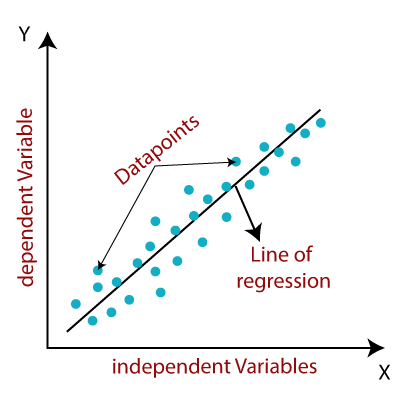


*Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.*

In [1135]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)

LR_prediction=lr_clf.predict(X_test)
print('R2 Score :',r2_score(LR_prediction,Y_test)*100)
print('MAE:',mean_absolute_error(LR_prediction,Y_test))
print('MSE:',mean_squared_error(LR_prediction,Y_test))
rmse = sqrt(mean_squared_error(LR_prediction,Y_test))
print('RMSE:',rmse)

R2 Score : 87.89227829895019
MAE: 4711806.600447506
MSE: 45738820187393.69
RMSE: 6763048.143211291


By linear regression we get 87 % of accuracy

**Decision tree:**

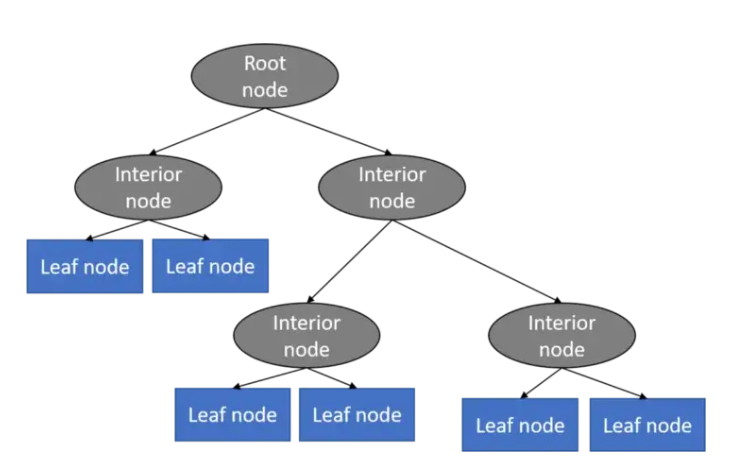

*Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.*

In [1136]:
DT = DecisionTreeRegressor()
DT.fit(X_train,Y_train)


DT_prediction=DT.predict(X_test)
print('R2 Score :',r2_score(DT_prediction,Y_test)*100)
print('MAE:',mean_absolute_error(DT_prediction,Y_test))
print('MSE:',mean_squared_error(DT_prediction,Y_test))
rmse = sqrt(mean_squared_error(DT_prediction,Y_test))
print('RMSE:',rmse)

R2 Score : 92.10059848833623
MAE: 1202278.7698209719
MSE: 19164938871580.582
RMSE: 4377777.846302914


By Decision Tree regression we get almost 92 % of accuracy

Random Forest:


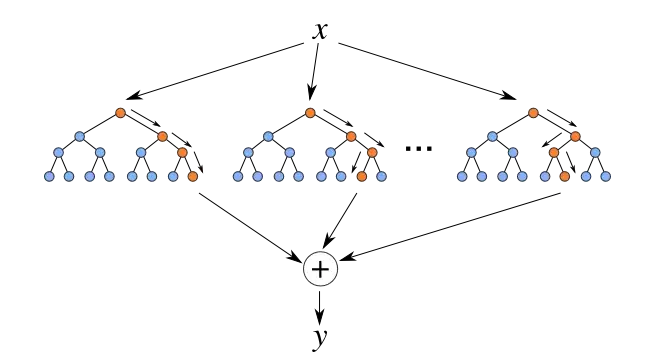

*Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.*

In [1137]:
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

RF_prediction=RF.predict(X_test)
print('R2 Score :',r2_score(RF_prediction,Y_test)*100)
print('MAE:',mean_absolute_error(RF_prediction,Y_test))
print('MSE:',mean_squared_error(RF_prediction,Y_test))
rmse = sqrt(mean_squared_error(RF_prediction,Y_test))
print('RMSE:',rmse)

RF.score(X_test,Y_test)

R2 Score : 95.75608743132642
MAE: 756378.5410997443
MSE: 11529668815485.47
RMSE: 3395536.6019946644


0.9601509720180429

By Random Forest regression we get almost 96 % of accuracy.and we can clearly say random forest is performing well in this scenario.

Now we can see How actual and predicted values are differ from each other

In [1138]:
pd.DataFrame(data={'Actual':Y_test,'Predicted':RF_prediction}).head()

,Actual,Predicted
831,4200000,4139480.0
625,14200000,14115000.0
358,7200000,7080000.0
1112,8000000,8431610.0
646,11800000,11578000.0


# Building a predictive System

In [1140]:
Input_data=np.array([[1245,3,2.0,1,1,1,0.0,0,0,0,11967.871486]])
Predictive_system=lr_clf.predict(Input_data)
print(Predictive_system)

[21490646.64595919]
